In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

df=pd.read_csv("penguins.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [2]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 14.4 KB


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("sex", axis=1)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((268, 4), (67, 4))

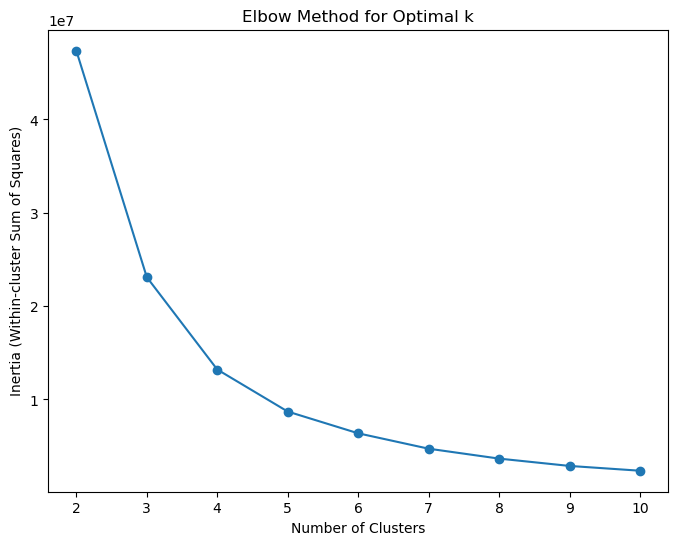

In [4]:
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()

In [5]:
model = KMeans(n_clusters=6)
model.fit(df)
model.cluster_centers_

array([[4.57370968e+01, 1.52419355e+01, 2.12500000e+02, 4.85120968e+03,
        1.30645161e+00],
       [4.24741935e+01, 1.83978495e+01, 1.91580645e+02, 3.72903226e+03,
        1.50537634e+00],
       [4.99387755e+01, 1.57979592e+01, 2.22142857e+02, 5.59285714e+03,
        2.00000000e+00],
       [4.20000000e+01, 2.02000000e+01, 5.00000000e+03, 4.25000000e+03,
        2.00000000e+00],
       [4.45854839e+01, 1.78790323e+01, 1.95887097e+02, 4.25725806e+03,
        1.72580645e+00],
       [3.96617647e+01, 1.75441176e+01, 1.88044118e+02, 3.23897059e+03,
        1.10294118e+00]])

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)

0.535865428842374

In [13]:
train_df, _ = train_test_split(df, test_size=0.3, random_state=42)
train_df = train_df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]]
train_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
34,36.4,17.0,195.0,3325.0,1
26,40.6,18.6,183.0,3550.0,2
292,48.2,15.6,221.0,5100.0,2
302,47.4,14.6,212.0,4725.0,1
61,41.3,21.1,195.0,4400.0,2


In [16]:
model = KMeans(n_clusters=10)
model.fit(train_df)

KMeans(n_clusters=10)

In [15]:
model.cluster_centers_

array([[4.15216216e+01, 1.80864865e+01, 1.90360360e+02, 3.53558559e+03,
        1.36036036e+00],
       [4.86040816e+01, 1.54510204e+01, 2.19714286e+02, 5.39948980e+03,
        1.77551020e+00],
       [4.52500000e+01, 1.67648649e+01, 2.00648649e+02, 4.49087838e+03,
        1.50000000e+00]])

In [17]:
silhouette_score(train_df, model.labels_)

0.5536310602051872